<a href="https://colab.research.google.com/github/farhanadhilah/Exploratory-Data-Analysis/blob/main/Pros%20and%20Cons%20BBM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Project UAS EVDA Nadhilah Farhana (2106779516)**




# <center><font color="orange">**Pro dan Kontra Upaya Peralihan BBM Ramah Lingkungan**</font></center>

> Kenaikan harga BBM jenis Pertamax menimbulkan opini pro dan kontra di tengah masyarakat. Kenaikan harga yang cukup signifikan yaitu dari yang awalnya Rp. 9.000 per liter, per tanggal **1 April 2022** naik menjadi Rp. 12.500 per liter menjadi salah satu penyebab timbulnya opini pro dan kontra. Tak hanya itu, permasalahan buruknya kualitas udara di Indonesia, khususnya jakarta menjadi salah satu alasan pemerintah menggerakan upaya peralihan BBM ramah linkungan. Hal tersebut sejalan dengan program langit biru yang dijalan oleh pemerintah, yaitu program yang bertujuan untuk mengendalikan dan mencegah pencemaran udara dan mewujudkan perilaku sadar lingkungan baik dari sumber tidak bergerak (industri) maupun sumber bergerak (kendaraan bermotor).

  Pada projek ini akan dilakukan analisis sentiment dan analisis jaringan sosial mengenai upaya peralihan BBM ramah lingkungan. Data yang digunakan dalam projek ini diperoleh dari twitter.com melalui proses *crawling*. Data yang diperoleh berupa file dengan format json. File tersebut yang selanjutnya digunakan untuk proses analisis. Proses *crawling* dilakukan menggunakan query
  
> qry = 'pertamax OR "harga pertamax" OR "pertamax naik" OR "bbm naik" OR "pertamax bbm" OR "harga pertamax naik"'

  Data yang diperoleh dari hasil *crawling* memuat beberapa variabel. Pada projek ini variabel yang akan digunakan adalah ***user (screen_name)*** yaitu nama pembuat tweet dan ***full_text*** yaitu tulisan (tweet) yang diunggah di twitter.



## **Import Libraries**

In [ ]:
import warnings; warnings.simplefilter('ignore')
import nltk

try:
    import google.colab
    IN_COLAB = True
    !wget https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/taudataDDGsna.py
    !wget https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/taudata_sna.py
    !mkdir data
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/contoh.pdf
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/slang.txt
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/stopwords_id.txt
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/stopwords_en.txt
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/kata_dasar.txt
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/wn-ind-def.tab
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/wn-msa-all.tab
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/ind_SA.csv
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/all_indo_man_tag_corpus_model.crf.tagger

    !pip install --upgrade spacy python-crfsuite unidecode textblob sastrawi sklearn-pycrfsuite
    !pip install --upgrade unidecode twython tweepy beautifulsoup4 tika
    !python -m spacy download en
    !python -m spacy download xx
    !python -m spacy download en_core_web_sm
    nltk.download('popular')
except:
    IN_COLAB = False
    print("Running the code locally, please make sure all the python module versions agree with colab environment and all data/assets downloaded")

--2022-06-12 11:16:53--  https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/taudataDDGsna.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8030 (7.8K) [text/plain]
Saving to: ‘taudataDDGsna.py’

taudataDDGsna.py    100%[===================>]   7.84K  --.-KB/s    in 0s      

2022-06-12 11:16:53 (55.8 MB/s) - ‘taudataDDGsna.py’ saved [8030/8030]

--2022-06-12 11:16:53--  https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/taudata_sna.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20088 (20K)

In [ ]:
import taudataDDGsna as tau
import taudata_sna as tau1
import tweepy, json, urllib.request, requests
from urllib.request import Request, urlopen
from twython import TwythonStreamer
from bs4 import BeautifulSoup as bs
from tqdm import tqdm

import pandas as pd, matplotlib.pyplot as plt, numpy as np, seaborn as sns, graphviz, networkx as nx
from collections import Counter
import re

"Done"

'Done'

##**Load Data Crawling Twitter**

In [ ]:
#data yang telah dicrawling kemudian disimpan di GitHub untuk memudahkan akses
!git clone https://github.com/farhanadhilah/EDA.git

Cloning into 'EDA'...
remote: Enumerating objects: 78, done.
remote: Counting objects: 100% (78/78), done.
remote: Compressing objects: 100% (71/71), done.
remote: Total 78 (delta 32), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (78/78), done.


In [ ]:
#load dataset
def loadTweets(file='Tweets.json'):
    f=open(file,encoding='utf-8', errors ='ignore', mode='r')
    T=f.readlines();f.close()
    for i,t in enumerate(T):
        T[i] = json.loads(t.strip())
    return T

In [ ]:
#memanggil data
data_tweet = loadTweets(file='/content/EDA/Sentiment-Analysis/Tweets_kebijakan_pertamax.json')
print('tweet pertama oleh "{}" : "{}"'.format(data_tweet[691]['user']['screen_name'],data_tweet[691]['full_text']))

tweet pertama oleh "awantimur1" : "Pajak kendaraan pajaknya cuman stop kena di yg punya kendaraan, kalau harga bbm naik   chain effectnya bakal kena ke sektor distribusi yg imbasnya ke masyarakat luas, yg udah pasti bebannya ke masyaakat. Bahan pokok udh pasti naik https://t.co/2L8RaTg02i"


In [ ]:
#melihat 5 tweet pertama
D = [t['full_text'] for t in data_tweet]
D[:5] #5 tweet pertama, dapat diganti untuk melihat dalam jumlah lain

['@energitodayID @pertamina @KemenBUMN Kalo gamau beli pertamax, download ya aplikasinya, dan dapatkan pertalite bersubsidi',
 '@pertaminamalupa @pertamina 😂 :kamu tau ga apa persamaan kamu dan pertamax\n😘 : gatau apaan donk.!!??\n😂: pertamax membuat tarikan lebih kencang\n       Kl kamu  membuat hatiku berdebar selalu. Ikan hiu makan tomatI love u somach ❤️❤️ #luckyfriday @ittaqillah_ @maziftakh @GozaliHafez @dwi_adhLiza @ddoktfn_',
 '@pertaminamalupa @pertamina Motor butuh Pertamax untuk melanjutkan perjalanan, aku butuh kamu untuk melanjutkan hidup. ⛽\n\n#LuckyFriday\n\n@DeviAsca\n@SanggaSiregar\n@jUaNMoRaNeTTi\n@MissEshaa\n@joannafitry\n\n#KebaikanUntukNegeri\n#MalupaTangguh \n#LuckyFriday',
 'RT @pertaminamalupa: Mau menangin saldo LinkAja total senilai Rp 200.  000? \nYuk, tulis gombalan terbaikmu tentang persamaan doi dan Pertam…',
 'RT @pertaminamalupa: Mau menangin saldo LinkAja total senilai Rp 200.  000? \nYuk, tulis gombalan terbaikmu tentang persamaan doi dan Pertam…']

In [ ]:
# Datanya berbentuk JSON
data_tweet[100]['created_at'], data_tweet[100]['full_text']

('Fri Jun 10 04:04:49 +0000 2022',
 '@NunoenkZidan @PutraErlangga95 Beli pertamax kak biar gak ribet. Jangan kek orang susah')

In [ ]:
df_json = pd.read_json('/content/EDA/Sentiment-Analysis/Tweets_kebijakan_pertamax.json', lines=True)
df_csv = df_json.to_csv('Tweets_kebijakan_pertamax.csv', index=False)
data_pertamax = pd.read_csv('Tweets_kebijakan_pertamax.csv')

In [ ]:
#karena data yang akan digunakan untuk analisis adalah data yang telah diberi label, maka akan di load dataset yang telah dilabelling
label = pd.read_csv('/content/EDA/Sentiment-Analysis/labelling_tweets.csv')
data_pertamax['label'] = label['label']
data_pertamax

,created_at,id,id_str,full_text,truncated,display_text_range,entities,metadata,source,in_reply_to_status_id,...,favorited,retweeted,lang,retweeted_status,extended_entities,possibly_sensitive,quoted_status_id,quoted_status_id_str,quoted_status,label
0,2022-06-10 09:02:02+00:00,1535185508308877312,1535185508308877312,@energitodayID @pertamina @KemenBUMN Kalo gama...,False,"[37, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'in', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",1.535051e+18,...,False,False,in,NaN,NaN,NaN,NaN,NaN,NaN,1
1,2022-06-10 08:56:12+00:00,1535184041410174976,1535184041410174976,@pertaminamalupa @pertamina 😂 :kamu tau ga apa...,False,"[28, 304]","{'hashtags': [{'text': 'luckyfriday', 'indices...","{'iso_language_code': 'in', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",1.535095e+18,...,False,False,in,NaN,NaN,NaN,NaN,NaN,NaN,1
2,2022-06-10 08:52:44+00:00,1535183168856199168,1535183168856199168,@pertaminamalupa @pertamina Motor butuh Pertam...,False,"[28, 250]","{'hashtags': [{'text': 'LuckyFriday', 'indices...","{'iso_language_code': 'in', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",1.535095e+18,...,False,False,in,NaN,NaN,NaN,NaN,NaN,NaN,1
3,2022-06-10 08:52:17+00:00,1535183057447456771,1535183057447456768,RT @pertaminamalupa: Mau menangin saldo LinkAj...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'in', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,...,False,False,in,{'created_at': 'Fri Jun 10 03:00:32 +0000 2022...,NaN,NaN,NaN,NaN,NaN,1
4,2022-06-10 08:49:42+00:00,1535182404360384513,1535182404360384512,RT @pertaminamalupa: Mau menangin saldo LinkAj...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'in', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,...,False,False,in,{'created_at': 'Fri Jun 10 03:00:32 +0000 2022...,NaN,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2645,2022-06-01 18:10:15+00:00,1532061983138529280,1532061983138529280,Biarpun aku gawena serabutan ayeuna kadang bog...,False,"[0, 225]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'in', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,...,False,False,in,NaN,NaN,NaN,NaN,NaN,NaN,1
2646,2022-06-01 17:43:22+00:00,1532055217683849216,1532055217683849216,@urfavdragon_ @convomf itu mie ayam apa harga ...,False,"[23, 57]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'in', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",1.532041e+18,...,False,False,in,NaN,NaN,NaN,NaN,NaN,NaN,1
2647,2022-06-01 17:19:51+00:00,1532049297055051776,1532049297055051776,@AgungSetiyadi13 Gw klu ikut turun balap di pa...,False,"[17, 214]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'in', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",1.532030e+18,...,False,False,in,NaN,NaN,NaN,NaN,NaN,NaN,-1
2648,2022-06-01 17:19:19+00:00,1532049165982740480,1532049165982740480,@sbyfess Ngombe ne oli opo pertamax?,False,"[9, 36]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'in', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",1.532049e+18,...,False,False,in,NaN,NaN,NaN,NaN,NaN,NaN,1


In [ ]:
#melihat tweet awal dan label yang telah diberikan
data_pertamax[['full_text', 'label']]

,full_text,label
0,@energitodayID @pertamina @KemenBUMN Kalo gama...,1
1,@pertaminamalupa @pertamina 😂 :kamu tau ga apa...,1
2,@pertaminamalupa @pertamina Motor butuh Pertam...,1
3,RT @pertaminamalupa: Mau menangin saldo LinkAj...,1
4,RT @pertaminamalupa: Mau menangin saldo LinkAj...,1
...,...,...
2645,Biarpun aku gawena serabutan ayeuna kadang bog...,1
2646,@urfavdragon_ @convomf itu mie ayam apa harga ...,1
2647,@AgungSetiyadi13 Gw klu ikut turun balap di pa...,-1
2648,@sbyfess Ngombe ne oli opo pertamax?,1


In [ ]:
#melihat kolom/variabel apa saja yang tersedia pada dataset
data_pertamax.columns

Index(['created_at', 'id', 'id_str', 'full_text', 'truncated',
       'display_text_range', 'entities', 'metadata', 'source',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str',
       'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place',
       'contributors', 'is_quote_status', 'retweet_count', 'favorite_count',
       'favorited', 'retweeted', 'lang', 'retweeted_status',
       'extended_entities', 'possibly_sensitive', 'quoted_status_id',
       'quoted_status_id_str', 'quoted_status', 'label'],
      dtype='object')

In [ ]:
#mengumpulkan hashtag
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

In [ ]:
#mengekstrak hashtag dari tweet
HT_regular = hashtag_extract(data_pertamax['full_text'])
HT_regular = sum(HT_regular,[])

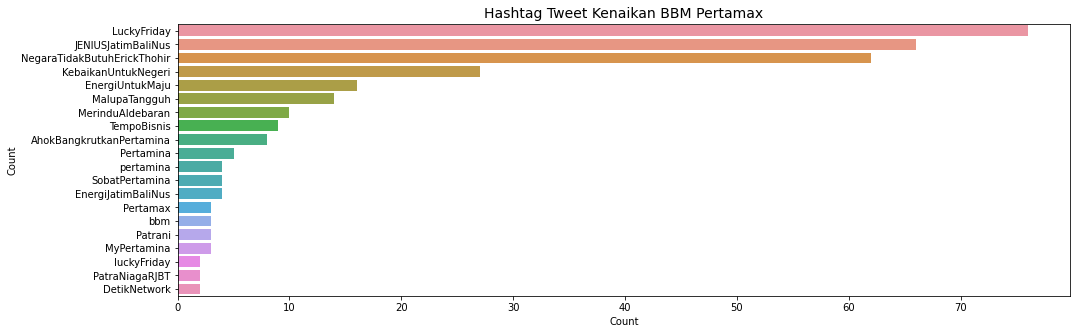

In [ ]:
a = nltk.FreqDist(HT_regular)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

#menampilkan 20 hashtag yang paling banyak muncul
d = d.nlargest(columns="Count", n = 20)
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Count", y = "Hashtag")
ax.set(ylabel = 'Count')
ax.set_title('Hashtag Tweet Kenaikan BBM Pertamax', fontsize = 14)
plt.show()

<font color="burgundy"> Hashtag yang muncul cenderung mengarah ke opini positif meskipun masih terdapat beberapa hashtag yang mengarah ke opini negatif kepada pejabat terkait seperti #NegaraTidakButuhErickTohir dan #AhokBangkrutkanPertamina. Namun, masih terdapat beberapa hashtag yang berisi hashtag kegiatan/paid promote. Hal tersebut menandakan bahwa data masih yang di crawling masih memuat noise. Kedepannya mungkin dapat diperbaiki bagian query untuk memfilter data lebih baik.

Text(0.5, 1.0, 'Proporsi Label')

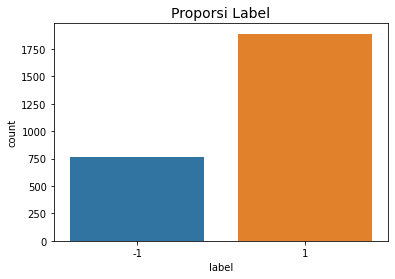

In [ ]:
#melihat proporsi label pada data
#keterangan label: -1 (negatif) dan 1 (positif)


ax = sns.countplot(data_pertamax['label'])
ax.set_title('Proporsi Label', fontsize = 14)

<font color="burgundy"> Label data: (1: Positif) dan (-1: Negatif). Proporsi label dari data didominasi oleh sentimen positif. Hal ini sejalan dengan hashtag yang juga didominasi oleh hashtag opini positif.

In [ ]:
#melihat jumlah pasti dari masing-masing label
data_pertamax['label'].value_counts()

 1    1888
-1     762
Name: label, dtype: int64

##**Preprocessing**

Tujuan dari tahap preprocessing adalah untuk membersihkan kata-kata yang tidak perlu atau kata-kata yang tidak memiliki makna. Langkah-langkah preprocessing yang dilakukan disesuaikan berdasarkan kondisi dari data tweet. Tahapan preprocessing yang dilakukan pada penelitian ini adalah:


1.   ***Data Cleaning***: menghapus karakter, simbol, hashtag, mention, dan angka.
2.   ***Slang Fix***: memperbaiki singkatan.
3. *** Remove StopWords***: menghapus kata-kata yang umum pada data dan kata-kata yang kurang bermakna atau tidak memiliki arti seperti kata: saya, dan, atau.
4. ***Tokenization***: memecah kalimat menjadi token.
5. ***Stemming***: mengubah sebuah kata ke dalam bentuk kata dasarnya dengan menghapus kata imbuhan di depan maupun imbuhan di belakang kata.

Setelah dilakukan tahapan preprocessing yang terakhir, yaitu stemming, kata-kata kembali dirangkai menjadi sebuah kalimat. Kalimat yang tersusun tersebut merupakan tweet yang telah selesai dilakukan preprocessing.



In [ ]:
#menghapus mention yang terdapat pada tweet full_text
#preprocessing yang dilakukan pada tahap ini 'hanya menghapus mention'
def cleaningText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # remove mentions
    return text

data_pertamax['clean_text'] = data_pertamax['full_text'].apply(cleaningText)

In [ ]:
#melihat perbedaan setelah dihapus mention dan sebelum dihapus
data_pertamax[['full_text', 'clean_text']]

,full_text,clean_text
0,@energitodayID @pertamina @KemenBUMN Kalo gama...,"Kalo gamau beli pertamax, download ya aplik..."
1,@pertaminamalupa @pertamina 😂 :kamu tau ga apa...,😂 :kamu tau ga apa persamaan kamu dan pertam...
2,@pertaminamalupa @pertamina Motor butuh Pertam...,Motor butuh Pertamax untuk melanjutkan perja...
3,RT @pertaminamalupa: Mau menangin saldo LinkAj...,RT : Mau menangin saldo LinkAja total senilai ...
4,RT @pertaminamalupa: Mau menangin saldo LinkAj...,RT : Mau menangin saldo LinkAja total senilai ...
...,...,...
2645,Biarpun aku gawena serabutan ayeuna kadang bog...,Biarpun aku gawena serabutan ayeuna kadang bog...
2646,@urfavdragon_ @convomf itu mie ayam apa harga ...,_ itu mie ayam apa harga pertamax???
2647,@AgungSetiyadi13 Gw klu ikut turun balap di pa...,Gw klu ikut turun balap di padock.atau saat s...
2648,@sbyfess Ngombe ne oli opo pertamax?,Ngombe ne oli opo pertamax?


In [ ]:
#pada tahap ini dilakukan tahap preprocessing menggunakan libraries taudata yang meliputi:

slangFixId = tau.loadCorpus(file = 'data/slang.txt', sep=':')
stopId, _ = tau.LoadStopWords(lang='id')
stopId.add("rt") #menambahkan kata/karakter "rt" yang banyak muncul pada data untuk dihapus

list(stopId)[:5]

['berada', 'mengatakannya', 'jelaslah', 'melihatnya', 'pantas']

In [ ]:
from tqdm import tqdm

cleanData = []
for t in tqdm(data_pertamax['clean_text']):
    doc = tau.cleanText(t, fix=slangFixId, lan='id', stops = stopId)
    cleanData.append(doc)

"Done"

100%|██████████| 2650/2650 [00:03<00:00, 782.21it/s]


'Done'

In [ ]:
#melhat perbedaan salah satu tweet sebelum dan setelah preprocessing
print('Data awal:', data_pertamax['full_text'][0], end='\n\n')
print('Data bersih:', cleanData[0], end='\n\n')

Data awal: @energitodayID @pertamina @KemenBUMN Kalo gamau beli pertamax, download ya aplikasinya, dan dapatkan pertalite bersubsidi

Data bersih: tidak mau beli download iya aplikasinya dapatkan pertalite bersubsidi



In [ ]:
import numpy as np

data_pertamax['preprocessed_text'] = np.array(cleanData)
data_pertamax[['full_text', 'preprocessed_text']]

,full_text,preprocessed_text
0,@energitodayID @pertamina @KemenBUMN Kalo gama...,tidak mau beli download iya aplikasinya dapatk...
1,@pertaminamalupa @pertamina 😂 :kamu tau ga apa...,persamaan tidak tahu tarikan kencang hatiku be...
2,@pertaminamalupa @pertamina Motor butuh Pertam...,motor butuh melanjutkan perjalanan butuh melan...
3,RT @pertaminamalupa: Mau menangin saldo LinkAj...,menangin saldo linkaja total senilai rp ayo t...
4,RT @pertaminamalupa: Mau menangin saldo LinkAj...,menangin saldo linkaja total senilai rp ayo t...
...,...,...
2645,Biarpun aku gawena serabutan ayeuna kadang bog...,biarpun gawena serabutan ayeuna kadang boga ua...
2646,@urfavdragon_ @convomf itu mie ayam apa harga ...,mie ayam harga
2647,@AgungSetiyadi13 Gw klu ikut turun balap di pa...,klu turun balap padock.atau scrute unit pakai ...
2648,@sbyfess Ngombe ne oli opo pertamax?,ngombe oli opo


In [ ]:
from nltk.tokenize import word_tokenize
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

def tokenizingText(text): # Tokenizing or splitting a string, text into a list of tokens
    text = word_tokenize(text)
    return text

def stemmingText(text): # Reducing a word to its word stem that affixes to suffixes and prefixes or to the roots of words
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    text = [stemmer.stem(word) for word in text]
    return text

def toSentence(list_words): # Convert list of words into sentence
    sentence = ' '.join(word for word in list_words)
    return sentence

data_pertamax['preprocessed_text'] = data_pertamax['preprocessed_text'].apply(tokenizingText)
data_pertamax['preprocessed_text'] = data_pertamax['preprocessed_text'].apply(stemmingText)
data_pertamax['preprocessed_text'] = data_pertamax['preprocessed_text'].apply(toSentence)

In [ ]:
data_pertamax[['full_text', 'preprocessed_text']]

,full_text,preprocessed_text
0,@energitodayID @pertamina @KemenBUMN Kalo gama...,tidak mau beli download iya aplikasi dapat per...
1,@pertaminamalupa @pertamina 😂 :kamu tau ga apa...,sama tidak tahu tari kencang hati debar ikan h...
2,@pertaminamalupa @pertamina Motor butuh Pertam...,motor butuh lanjut jalan butuh lanjut hidup lu...
3,RT @pertaminamalupa: Mau menangin saldo LinkAj...,menangin saldo linkaja total nila rp ayo tulis...
4,RT @pertaminamalupa: Mau menangin saldo LinkAj...,menangin saldo linkaja total nila rp ayo tulis...
...,...,...
2645,Biarpun aku gawena serabutan ayeuna kadang bog...,biarpun gawena serabutan ayeuna kadang boga ua...
2646,@urfavdragon_ @convomf itu mie ayam apa harga ...,mie ayam harga
2647,@AgungSetiyadi13 Gw klu ikut turun balap di pa...,klu turun balap padock atau scrute unit pakai ...
2648,@sbyfess Ngombe ne oli opo pertamax?,ngombe oli opo


<font color="burgundy"> Setelah dilakukan proses preprocessing pada data tweet, seperti pada tabel di atas terlihat perbedaan antara tweet awal (full_text) dengan tweet bersih (preprocessed_text). Namun, hasil preprocessing masih "belum bersih" karena, sebagai contoh, pada tweet di index ke 3 dan 4 masih memuat imbuhan pada kata "menangin". Kedepannya diperlukan improvement code untuk mendapatkan hasil preprocessing data yang lebih baik.

In [ ]:
data_pertamax['preprocessed_text'].replace('', np.nan, inplace=True)

<font color="burgundy"> Setelah melewati tahap preprocessing, tak jarang suatu kalimat dalam tweet "habis" dipangkas dalam tahap preprocessing karena dalam tweet tersebut hanya memuat kata-kata yang umum dan tidak bernilai. Oleh karena itu dilakukan pengecekan kembali apakah terdapat tweet bersih yang kosong pada data.

In [ ]:
print('Tweet kosong: ', data_pertamax['preprocessed_text'].isnull().sum())

Tweet kosong:  88


In [ ]:
data_pertamax.dropna(subset=['preprocessed_text'], inplace=True)
data_pertamax['preprocessed_text']

0       tidak mau beli download iya aplikasi dapat per...
1       sama tidak tahu tari kencang hati debar ikan h...
2       motor butuh lanjut jalan butuh lanjut hidup lu...
3       menangin saldo linkaja total nila rp ayo tulis...
4       menangin saldo linkaja total nila rp ayo tulis...
                              ...                        
2645    biarpun gawena serabutan ayeuna kadang boga ua...
2646                                       mie ayam harga
2647    klu turun balap padock atau scrute unit pakai ...
2648                                       ngombe oli opo
2649                                                 nder
Name: preprocessed_text, Length: 2562, dtype: object

## **EDA**

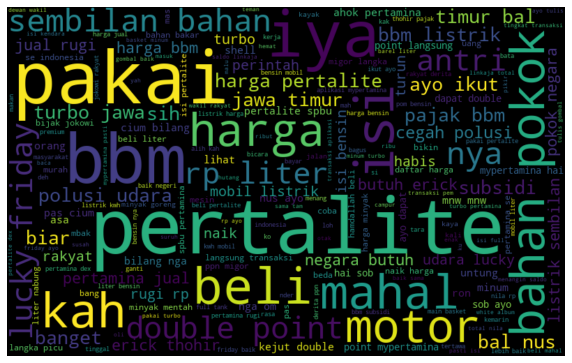

In [ ]:
all_words = ' '.join([text for text in data_pertamax['preprocessed_text']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

<font color="burgundy"> Hasil WordCloud di atas menunjukkan bahwa kata-kata yang muncul dalam ukuran yang lebih besar dibandingkan dengan kata lainnya merupakan kata yang mendominasi topik perbincangan mengenai kenaikan harga BBM Pertamax. Kata yang muncul paling besar adalah "pertalite". Hal ini menjadi dapat menjadi indikasi bahwa masyarakat cenderung membandingkan BBM jenis Pertamax dengan Pertalite. Selain itu "harga" dan "mahal" juga ikut mendominasi WorCloud. Kata lain yang menjadi perhatian adalah "bahan pokok". Kenaikan harga BBM berimbas juga pada kenaikan bahan pokok lainnya.

**<font color="green"> Lalu bagaimana dengan sentimen positif dan negatif? Apakah terdapat perbedaan signifikan antara sentimen positif dengan sentimen negatif dari masyarakat?**

Hal tersebut dapat dilihat melalui Wordcloud yang dipisahkan antara sentimen positif dan negatif.

In [ ]:
positif = data_pertamax[data_pertamax['label']==1]['preprocessed_text']
negatif = data_pertamax[data_pertamax['label']==-1]['preprocessed_text']

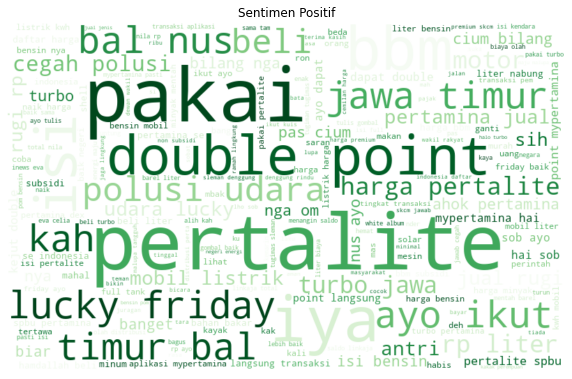

In [ ]:
all_words = ' '.join([text for text in positif])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, background_color = 'white', colormap = 'Greens', max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Sentimen Positif")
plt.show()

<font color="burgundy"> Pada WordCloud dari tweet dengan sentimen positif terlihat bahwa "pertalite" ikut mendominasi pada topik perbincangan kenaikan harga BBM jenis Pertamax. Hal yang menarik pada WordCloud ini adalah muncul kata "polusi udara". Namun, kata tersebut tidak terlalu mendominasi topik perbincangan di kalangan netizen. Sehingga, dapat diindikasi bahwa upaya pemerintah untuk mengedukasi dan menggerakan peralihan BBM ramah lingkungan di masyarakat masih kurang.

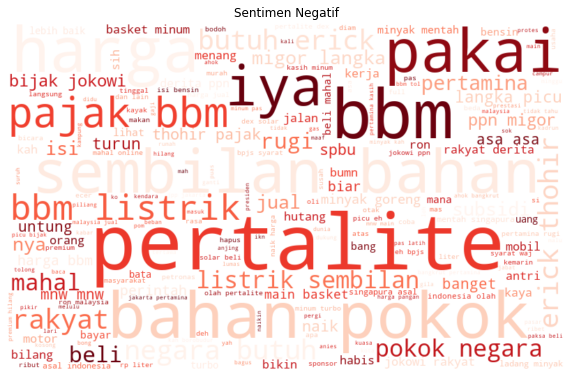

In [ ]:
all_words = ' '.join([text for text in negatif])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, background_color = 'white', colormap = 'Reds', max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Sentimen Negatif")
plt.show()

<font color="burgundy"> Sementara pada WordCloud dengan sentimen negatif cenderung dipenuhi topik yang disangkut pautkan dengan kenaikan harga BBM. Kata "pertalite" menjadi kata yang juga mendominasi seperti pada tweet dengan sentimen positif. Kata-kata lain yang terkait dengan kenaikan harga BBM antara lain: "bahan pokok", "pajak", "mahal", dan "rugi" menjadi indikasi bahwa munculnya opini kontra di tengah masyarakat akibat adanya imbas kenaikan harga BBM dengan kebutuhan pokok lainnya. Selain itu kata "bijak jokowi" menjadi indikasi adanya kritik dari masyarakat terkait kebijakan-kebijakan yang dikeluarkan, seperti sebelum kenaikan harga BBM terjadi, terlebih dahulu kebijakan pajak dinaikkan menjadi 11% dari yang sebelumnya 10%. Hal tersebut yang mungkin menjadi  dasar opini kontra yang dilontarkan oleh para netizen.

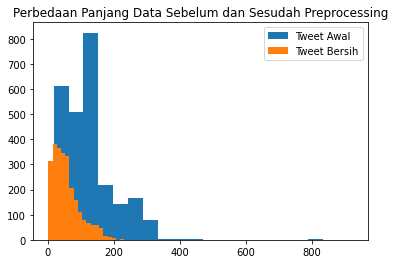

In [ ]:
length_awal = data_pertamax['full_text'].str.len()
length_bersih = data_pertamax['preprocessed_text'].str.len()

plt.hist(length_awal, bins=20, label="Tweet Awal")
plt.hist(length_bersih, bins=20, label="Tweet Bersih")
plt.legend()
plt.title("Perbedaan Panjang Data Sebelum dan Sesudah Preprocessing")
plt.show()

<font color="burgundy"> Grafik di atas menunjukkan perbedaan panjang kata dalam tweet sebelum preprocessing dan setelah preprocessing. Terlihat perbedaan yang cukup signifikan yang menandakan pengurangan kata dalam kalimat tweet.

In [ ]:
#kata yang paling banyak dan umum diperbincankan saat membahas topik kenaikan harga BBM Pertamax
data_pertamax['temp_list'] = data_pertamax['preprocessed_text'].apply(lambda x:str(x).split())
top = Counter([item for sublist in data_pertamax['temp_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(10))
temp.columns = ['Kata Umum','Jumlah']
temp.style.background_gradient(cmap='Blues')

,Kata Umum,Jumlah
0,harga,495
1,pertalite,487
2,bbm,456
3,pertamina,309
4,pakai,286
5,isi,275
6,beli,271
7,turbo,243
8,bensin,217
9,liter,207


<font color="burgundy"> Dari tabel di atas dapat diketahui 10 kata yang paling banyak muncul dalam cuitan tweet netizen. Di peringkat pertama, yaitu kata "harga" adalah kata yang paling mendominasi.

In [ ]:
# Save ke txt ... lalu nanti akan di upload ke Voyant Tools
filename = 'tweets_pertamax.txt'
with open(filename, 'w') as f:
    for T in data_pertamax['preprocessed_text']:
        f.write(T+'\n')

"Tweets Saved!"

'Tweets Saved!'

<font color="burgundy"> Hasil analisis visualisasi menggunakan VoyantTools terlampir di Word.

# <center><font color="orange">**Klasifikasi (SVM)**</font></center>

Metode klasifikasi yang digunakan pada penelitian ini adalah Support Vector Machine (SVM). Data yang digunakan sebanyak 2562 data. Data yang digunakan pada penelitian ini merupakan data teks yang termasuka pada data tidak terstruktur. Oleh karena itu diperlukan konversi data dari teks menjadi vektor agar dapat diolah oleh komputer. Cara konversi yang digunakan pada penelitian ini adalah Tf-Idf (Term frequency and Inverse document frequency) yang bertujuan untuk memberikan bobot pada data.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(lowercase=True, smooth_idf= True, sublinear_tf=True,
                                   ngram_range=(1, 2), max_df=0.90, min_df=2)

In [ ]:
##TFIDF
an_pertamax = data_pertamax[['full_text', 'preprocessed_text', 'label']]
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import gensim
#vectorizer = TfidfVectorizer(ngram_range=(1, 2))
vectorizer = TfidfVectorizer(max_df=0.1, min_df=5, ngram_range=(1, 2))

listdata=an_pertamax['preprocessed_text'].values.astype('object')
listdata = [d for d in listdata]

listdata
v = TfidfVectorizer(decode_error='replace', encoding='utf-8')
tfidf = v.fit_transform(an_pertamax['preprocessed_text'].values.astype('U'))
y = an_pertamax.iloc[:, 1].values
print(tfidf.shape, len(y))

(2562, 4332) 2562


In [ ]:
from sklearn.model_selection import train_test_split
seed = 1
X = an_pertamax['preprocessed_text'].values.astype('U')
y = an_pertamax['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)
X_train = vectorizer.fit_transform(X_train) # "Fit_Transform"
X_test = vectorizer.transform(X_test) # Perhatikan disini hanya "Transform"

print(X_train.shape, X_test.shape)

(1793, 981) (769, 981)


In [ ]:
def hapusKosong(X,y):
    y = y[X.getnnz(1)>0] # delete label dokumen yang memiliki row =0 di tfidf-nya
    X = X[X.getnnz(1)>0] # Remove Zero Rows
    return X, y

X_train, y_train = hapusKosong(X_train, y_train)
X_test, y_test = hapusKosong(X_test, y_test)
print(X_train.shape, X_test.shape)

(1721, 981) (733, 981)


In [ ]:
#svm
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

dSVM = svm.SVC(kernel = 'linear')
dSVM.fit(X_train, y_train)
y_SVM = dSVM.predict(X_test)
print('Akurasi = ', accuracy_score(y_test, y_SVM))
print(confusion_matrix(y_test, y_SVM))
print(classification_report(y_test, y_SVM))

Akurasi =  0.8362892223738063
[[138  78]
 [ 42 475]]
              precision    recall  f1-score   support

          -1       0.77      0.64      0.70       216
           1       0.86      0.92      0.89       517

    accuracy                           0.84       733
   macro avg       0.81      0.78      0.79       733
weighted avg       0.83      0.84      0.83       733



<font color="burgundy"> Hasil akurasi klasisifikasi yang diperoleh cukup baik, yaitu 0.84 atau 84%

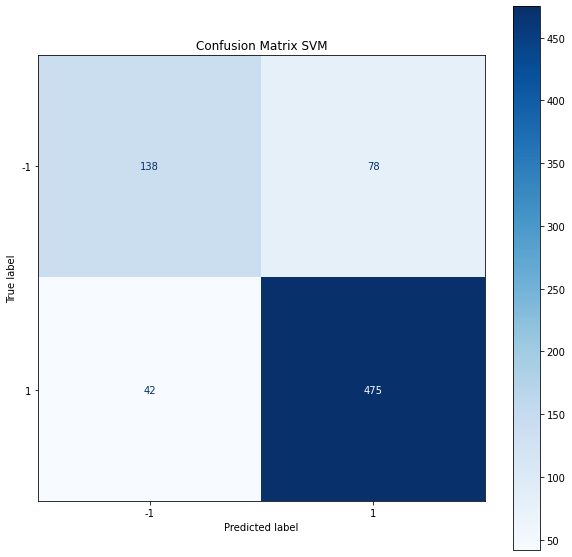

In [ ]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(dSVM, X_test, y_test, cmap=plt.cm.Blues, ax=ax)
plt.savefig('confusion matrix.png')
plt.title('Confusion Matrix SVM')
plt.show()

##**$K$-*Fold Cross Validation***

Untuk memastikan hasil penelitian ini, dilakukan juga pengujian dengan *K-Fold Cross Validation* dengan k sebesar 10.

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

pipeSVM = make_pipeline(svm.SVC())
kCV = 10
# defining parameter range
param_grid = {'C': [0.1,1, 5, 10],
              'kernel': ['linear']}

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
grid.fit(X_train, y_train)

# print best parameter after tuning
print("best parameters:",grid.best_params_)

# print how our model looks after hyper-parameter tuning

print("accuracy:",grid.best_score_)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END ..............C=0.1, kernel=linear;, score=0.777 total time=   0.1s
[CV 2/5] END ..............C=0.1, kernel=linear;, score=0.791 total time=   0.1s
[CV 3/5] END ..............C=0.1, kernel=linear;, score=0.744 total time=   0.1s
[CV 4/5] END ..............C=0.1, kernel=linear;, score=0.767 total time=   0.1s
[CV 5/5] END ..............C=0.1, kernel=linear;, score=0.779 total time=   0.1s
[CV 1/5] END ................C=1, kernel=linear;, score=0.841 total time=   0.1s
[CV 2/5] END ................C=1, kernel=linear;, score=0.872 total time=   0.1s
[CV 3/5] END ................C=1, kernel=linear;, score=0.846 total time=   0.1s
[CV 4/5] END ................C=1, kernel=linear;, score=0.863 total time=   0.1s
[CV 5/5] END ................C=1, kernel=linear;, score=0.855 total time=   0.1s
[CV 1/5] END ................C=5, kernel=linear;, score=0.835 total time=   0.1s
[CV 2/5] END ................C=5, kernel=linear;,

<font color="burgundy"> Dengan menggunakan *cross validation* dapat dilihat nilai akurasi meningkat menjadi 0.855 atau 85.5%.

#**Social Network Analysis**

Analisis Jaringan Sosial yang dilakukan pada penelitian ini berfokus pada melihat pusat hubungan dari user yang ada untuk menemukan pengguna yang paling berpengaruh dalam topik pembicaraan di media sosial.

In [ ]:
Tweets = [t['full_text'] for t in data_tweet] # Hanya mengambil tweeet saja .
Usernames = [t['user']['screen_name'] for t in data_tweet] # Hanya mengambil username saja .
Usernames[:5]

['SuciRam29302641', 'IsmiNofianti', 'f_rochman', 'IsmiNofianti', 'f_rochman']

Please wait, building Graph .... 


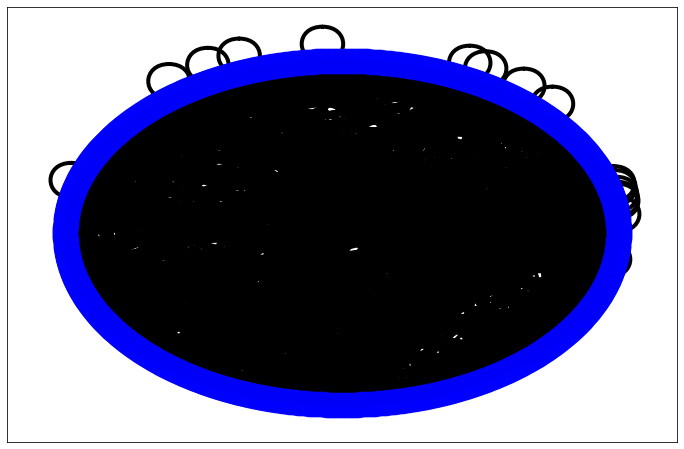

Finished. There are 3709 nodes and 3513 edges in the Graph.


In [ ]:
# Draw the Tweet Graph
plt.subplots(figsize=(12,8))

G = tau1.Graph([Usernames,Tweets], Label = False, layOut='circular', plain=True) # layOut = spring, circular, random, shells, spectral

<font color="burgundy"> Graf yang terbentuk sangat kompleks, sehingga sulit untuk diinterpretasi. Untuk melihat informasi hubungan antar user, dapat dilakukan dengan menggunakan metode perhitungan derajat dan kedekatan.

In [ ]:
# Let's now examine, who are the most "important" users in this Graph?
Gt = tau1.Centrality(G, N=10, method='degree', outliers=False, Label = True, layOut='spring')

Influencial Users: ['pertamina', 'pertaminamalupa', 'KuntoAjiW', 'anina_mq', 'plongokidi', 'ppnjatimbalinus', 'corbuzier', 'YudiSet16452924', 'whong_jowo', 'plisitin']
Influencial Users Scores: [0.02858684 0.02130529 0.02076591 0.01645092 0.01618123 0.01537217
 0.01402373 0.01321467 0.01294498 0.0126753 ]


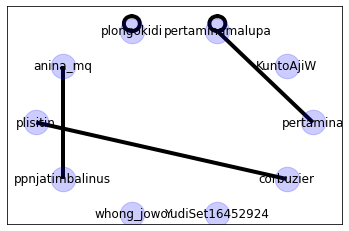

In [ ]:
tau1.drawGraph(Gt, True, layOut='circular')

<font color="burgundy"> Berdasarkan metode derajat, terlihat bahwa akun pertamina dan akun pertaminamalupa saling terhubung. Akun anina_mq dan akun ppnjatimbalinus juga terhubung. Kemudian akun corbuzier terhubung dengan akun plisitin. Hal ini menjadi indikasi bahwa adanya hubungan cuitan tweet yang dilakukan oleh akun-akun tersebut.

In [ ]:
Gt = tau1.Centrality(G, N=10, method='closeness', outliers=False, Label = True, layOut='spring')

Influencial Users: ['pertamina', 'sidulang', 'oneilz6', 'carepucuk', 'pertaminamalupa', 'MarioGaBoros', 'Hamidwija', 'mhasghung', 'scorpioohh', 'BatawiArif']
Influencial Users Scores: [0.09933135 0.09206696 0.09205397 0.09205397 0.08898885 0.08759037
 0.08600769 0.0843828  0.08436097 0.08432824]


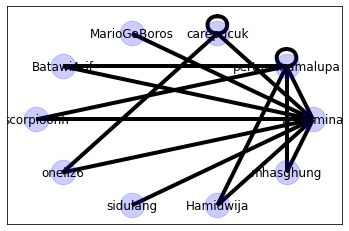

In [ ]:
tau1.drawGraph(Gt, True, layOut='circular')

<font color="burgundy"> Dari graf di atas terlihat bahwa akun pertamina menjadi pusat jaringan user yang mengartikan bahwa akun pertamina menjadi akun yang paling berpengaruh dalam topik bahasan kenaikan harga BBM pertamax.

## **Community Detection**

CD dilakukan pada data jaringan media sosial untuk menemukan komunitas-komunitas dalam pertemanan atau pembicaraan di media sosial. Secara sederhana CD dapat dimengerti sebagai proses "semacam clustering" (pengelompokan), namun atas suatu graf.

Berikut adalah beberapa kelompok yang terbentuk dari topik perbincangan kenaikan harga BBM jenis Pertamax.

In [ ]:
# Clustering pada Graph = Community Detection
Gt = nx.algorithms.community.greedy_modularity_communities(G)
for community in Gt:
    print(community)

frozenset({'Sitinurpalah88', 'pertamina', 'AuliaRa88244469', 'XTTXTR', 'Lia', 'Lattae_tae', 'pertamaxseries', 'itsdilzee', 'Andrimawardi17', 'ayudiaputri', 'PembebasanTinta', 'iyaanfn', 'yantira99', 'Cheppy_Gunawan', 'mairahafa', 'cryptaqim', 'sadad', 'daniellsinaga', 'KokoKR8', 'natalia453640', 'KapoorTulis', 'BPoer94', 'Arwini03', 'SuswitaG', 'utami', 'mierhaft', 'Maghribkuyy', 'NiaChoerniati', 'rosita25ashma', 'yosiska', 'sriretbigwin', 'Muhib26_', 'BSAdon', 'FA', 'yesimeriana', 'ahmad', 'AkuDelia99', 'GoenRoos', 'dinafaramitha', 'apriliani', 'IR080483', 'Mithaprstw', 'linkthie', 'EmaMaeemana', 'Widya_0996', 'Ishq', 'Rantisulasmyy', 'SilviaMarylin', 'energitodayID', 'ansswams', 'qolbiku', 'dillanrfna', 'AkbarPriatni', 'maziftakh', 'mailyakin', 'Azir_abuhars', 'Alfatahers', 'terpukaw', 'MukMuk', 'SitiAis28397893', 'rhutiyyy', 'Dapur', 'AstrianiRahmaw3', 'rizaldv_', 'mpo', 'KenPramono', 'Claudineudin', 'meili76moruk', 'larasaprilly', 'Oxafifanahda', 'crownead', 'SRini', 'maila', 'seju

## **Gephi**

<font color="burgundy"> Analisis Jaringan sosial juga dapat dilakukan melalui aplikasi gephi. Untuk menggunakan aplikasi gephi, diperlukan data input dalam format gexf. Berikut adalah code konversi data json menjadi gexf.

In [ ]:
!pip install json-lines

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
with open('tweet_pertamax.jsonl', 'w') as outfile:
    for entry in data_tweet:
        json.dump(entry, outfile)
        outfile.write('\n')

In [ ]:
# name of the file with the Tweet objects
JSONL_FILE = 'tweet_pertamax.jsonl'

# name of the file that will be created/overwritten by the script
GEXF_FILE = 'pertamax_network.gexf'

#--------------------------- STOP -------------------------------#
# Don't edit anything below, if you don't know what you are doing.
#--------------------------- STOP -------------------------------#

import json_lines

def load_jsonl(file):
    tweets = []
    with open(file, 'rb') as f:
        for tweet in json_lines.reader(f, broken=True):
            reduced_tweet = {
                'created_at': tweet['created_at'],
                'id': tweet['id_str'],
                'username': tweet['user']['screen_name'],
                'user_joined': tweet['user']['created_at'][-4:],
                'user_id': tweet['user']['id_str'],
            }

            if 'derived' in tweet['user']:
                reduced_tweet['country'] = tweet['user']['derived']['locations'][0]['country'] \
                    if 'locations' in tweet['user']['derived'] else ""
                reduced_tweet['region'] = tweet['user']['derived']['locations'][0]['region'] \
                    if 'region' in tweet['user']['derived']['locations'][0] else ""

            if 'retweeted_status' in tweet:
                reduced_tweet['retweeted_user'] = {
                    'user_id': tweet['retweeted_status']['user']['id_str'],
                    'username': tweet['retweeted_status']['user']['screen_name'],
                    'user_joined': tweet['retweeted_status']['user']['created_at'][-4:]
                }

            tweets.append(reduced_tweet)
    return (tweets)

tweets = load_jsonl(JSONL_FILE)

import datetime
import lxml.etree as etree

def create_gexf(tweets, filename):
    attr_qname = etree.QName(
        "http://www.w3.org/2001/XMLSchema-instance", "schemaLocation")

    gexf = etree.Element('gexf',
                         {attr_qname: 'http://www.gexf.net/1.3draft  http://www.gexf.net/1.3draft/gexf.xsd'},
                         nsmap={
                             None: 'http://graphml.graphdrawing.org/xmlns/graphml'},
                         version='1.3')

    graph = etree.SubElement(gexf,
                             'graph',
                             defaultedgetype='directed',
                             mode='dynamic',
                             timeformat='datetime')
    attributes = etree.SubElement(
        graph, 'attributes', {'class': 'node', 'mode': 'static'})
    etree.SubElement(attributes, 'attribute', {
                     'id': 'country', 'title': 'country', 'type': 'string'})
    etree.SubElement(attributes, 'attribute', {
                     'id': 'region', 'title': 'region', 'type': 'string'})
    etree.SubElement(attributes, 'attribute', {
                     'id': 'year', 'title': 'year', 'type': 'integer'})

    nodes = etree.SubElement(graph, 'nodes')
    edges = etree.SubElement(graph, 'edges')

    for tweet in reversed(tweets):
        node = etree.SubElement(nodes,
                                'node',
                                id=tweet['user_id'],
                                Label=tweet['username'],
                                start=datetime.datetime.strptime(tweet['created_at'], '%a %b %d %X %z %Y').isoformat(
                                    timespec='seconds'),  # Fri Jul 27 07:52:57 +0000 2018
                                end=(datetime.datetime.strptime(
                                    tweet['created_at'], '%a %b %d %X %z %Y') + datetime.timedelta(seconds=1)).isoformat(timespec='seconds')
                                )
        attvalues = etree.SubElement(node, 'attvalues')
        etree.SubElement(attvalues,
                         'attvalue',
                         {'for': 'year',
                          'value': tweet['user_joined']
                          }
                         )
        if 'region' in tweet:
            etree.SubElement(attvalues,
                             'attvalue',
                             {'for': 'region',
                              'value': tweet['region']
                              }
                             )
        if 'country' in tweet:
            etree.SubElement(attvalues,
                             'attvalue',
                             {'for': 'country',
                              'value': tweet['country']
                              }
                             )
        if 'retweeted_user' in tweet:
            etree.SubElement(edges,
                             'edge',
                             {'id': tweet['id'],
                              'source': tweet['retweeted_user']['user_id'],
                              'target': tweet['user_id'],
                              # Fri Jul 27 07:52:57 +0000 2018
                              'start': datetime.datetime.strptime(tweet['created_at'], '%a %b %d %X %z %Y').isoformat(timespec='seconds'),
                              'end': (datetime.datetime.strptime(tweet['created_at'], '%a %b %d %X %z %Y') + datetime.timedelta(seconds=1)).isoformat(timespec='seconds')
                              }
                             )
            node = etree.SubElement(nodes,
                                    'node',
                                    id=tweet['retweeted_user']['user_id'],
                                    Label=tweet['retweeted_user']['username'],
                                    start=datetime.datetime.strptime(tweet['created_at'], '%a %b %d %X %z %Y').isoformat(
                                        timespec='seconds'),  # Fri Jul 27 07:52:57 +0000 2018
                                    end=(datetime.datetime.strptime(
                                        tweet['created_at'], '%a %b %d %X %z %Y') + datetime.timedelta(seconds=1)).isoformat(timespec='seconds')
                                    )
            attvalues = etree.SubElement(node, 'attvalues')
            etree.SubElement(attvalues,
                             'attvalue',
                             {'for': 'year',
                              'value': tweet['retweeted_user']['user_joined']
                              }
                             )

    with open(filename, 'w', encoding='utf-8')as f:
        f.write(etree.tostring(gexf, encoding='utf8',
                               method='xml').decode('utf-8'))
    print('Created gexf.')


create_gexf(tweets, GEXF_FILE)

Created gexf.


<font color="burgundy"> Hasil analisis visualisasi menggunakan Gephi terlampir di word.

# <center><font color="navy">**Terima Kasih**</font></center>